In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten, MaxPooling2D, Conv2D
import numpy as np


In [4]:
from tensorflow.keras.applications import VGG16

In [5]:
vgg16_model = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 16813381 (64.14 MB)
Trainable params: 16813381 (64.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
vgg16_model.trainable = False

In [14]:
# generators
data_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/flowers',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150),
    )

Found 4317 files belonging to 5 classes.


In [15]:
data_ds = data_ds.map(lambda x, y: (x / 255.0, y))

In [16]:
data_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(data_ds, epochs =10)

Epoch 1/10
135/135 [==============================] - 19s 94ms/step - loss: 0.8435 - accuracy: 0.6924
Epoch 2/10
135/135 [==============================] - 10s 69ms/step - loss: 0.4461 - accuracy: 0.8379
Epoch 3/10
135/135 [==============================] - 10s 69ms/step - loss: 0.3041 - accuracy: 0.8930
Epoch 4/10
135/135 [==============================] - 9s 68ms/step - loss: 0.1962 - accuracy: 0.9349
Epoch 5/10
135/135 [==============================] - 9s 67ms/step - loss: 0.1452 - accuracy: 0.9537
Epoch 6/10
135/135 [==============================] - 10s 70ms/step - loss: 0.0963 - accuracy: 0.9741
Epoch 7/10
135/135 [==============================] - 10s 70ms/step - loss: 0.0602 - accuracy: 0.9882
Epoch 8/10
135/135 [==============================] - 10s 69ms/step - loss: 0.0399 - accuracy: 0.9937
Epoch 9/10
135/135 [==============================] - 10s 68ms/step - loss: 0.0329 - accuracy: 0.9940
Epoch 10/10
135/135 [==============================] - 10s 71ms/step - loss: 0.0233 

In [19]:
import cv2

In [30]:
test_img = cv2.imread('/content/tulip-flower.jpg')

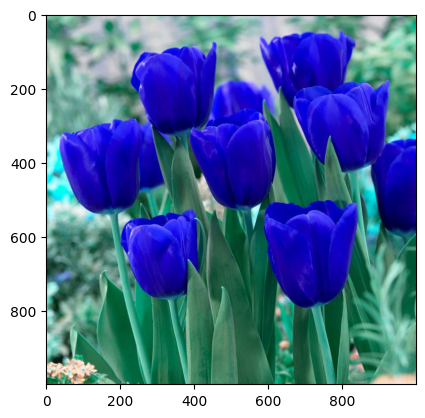

In [31]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [32]:
test_img = cv2.resize(test_img,(150,150))

In [33]:
test_input = test_img.reshape((1,150,150,3))

In [34]:
model.predict(test_input).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([4])